# Exercise Sheet 1: Clustering

In [1]:
# All imports
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from sklearn.datasets import make_circles


from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import HDBSCAN
from sklearn.cluster import AgglomerativeClustering

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import normalized_mutual_info_score
from sklearn.metrics.pairwise import euclidean_distances

# Ignore deprecation warnings from sklearn
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn.utils.deprecation")

### Exercise 1-1: Simple generation and visualization of data

* Create some data using python and sklearn, e.g., with `make_blobs`
* Visualize any two dimensions of the data in a 2d scatter plot, e.g., using `matplotlib2` or `seaborn`
* Visualize the data along its two main principal components OR using a tSNE visualization

In [2]:
# 1. Create some data using python and sklearn with 'make_blobs'
X, y = make_blobs(n_samples=300, centers=3, n_features=2, random_state=42)
print(X[:10])
print(y[:10])

[[-7.33898809 -7.72995396]
 [-7.74004056 -7.26466514]
 [-1.68665271  7.79344248]
 [ 4.42219763  3.07194654]
 [-8.91775173 -7.8881959 ]
 [ 5.49753846  1.81323115]
 [-2.3360167   9.39960351]
 [ 5.05281029  1.40944513]
 [-2.98837186  8.82862715]
 [-3.70050112  9.67083974]]
[2 2 0 1 2 1 0 1 0 0]


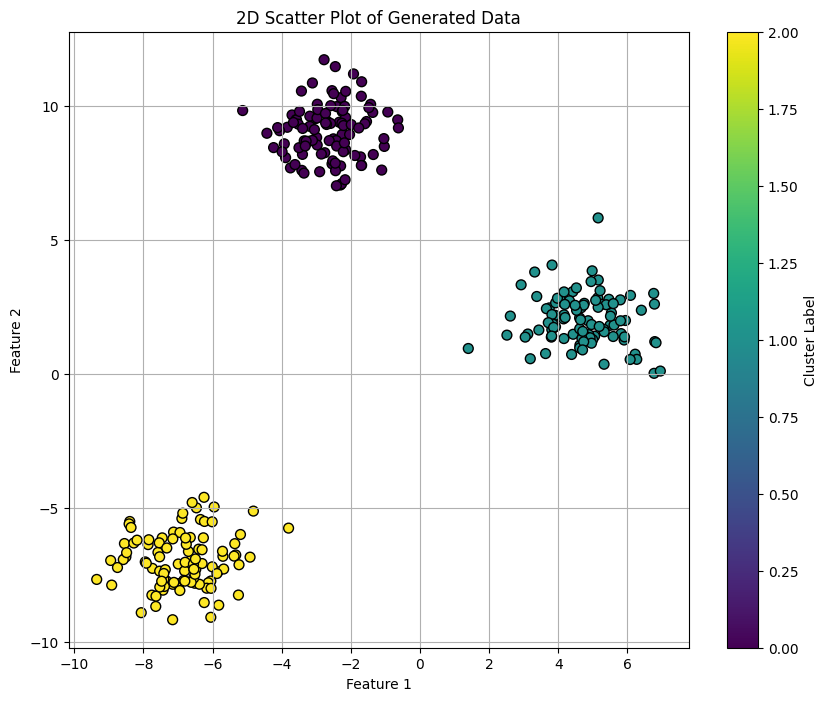

In [3]:
# 2. Visualize any two dimensions of the data in a 2d scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='k', s=50)
plt.title('2D Scatter Plot of Generated Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster Label')
plt.grid(True)
plt.show()

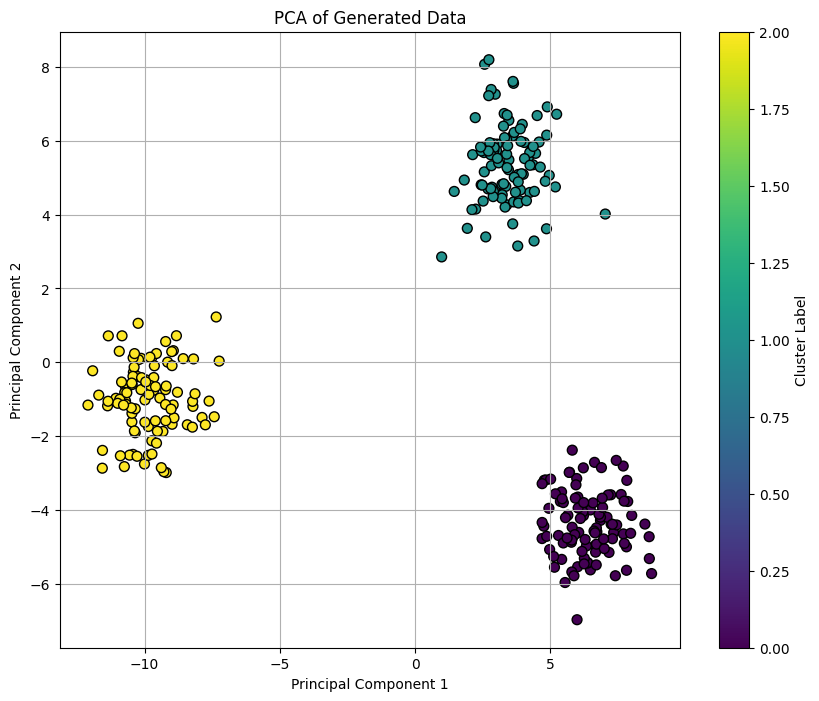

In [4]:
# 3. Visualize the data along its two main principal components (PCA)

# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Visualize the data
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolors='k', s=50)
plt.title('PCA of Generated Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.grid(True)
plt.show()

### Exercise 1-2: Different cluster algorithms solve different purposes

a) Create data that contains at least three density-based clusters that cannot be detected correctly by k-Means. Print the average **NMI** of the clusters that k-Means finds over 10 runs.

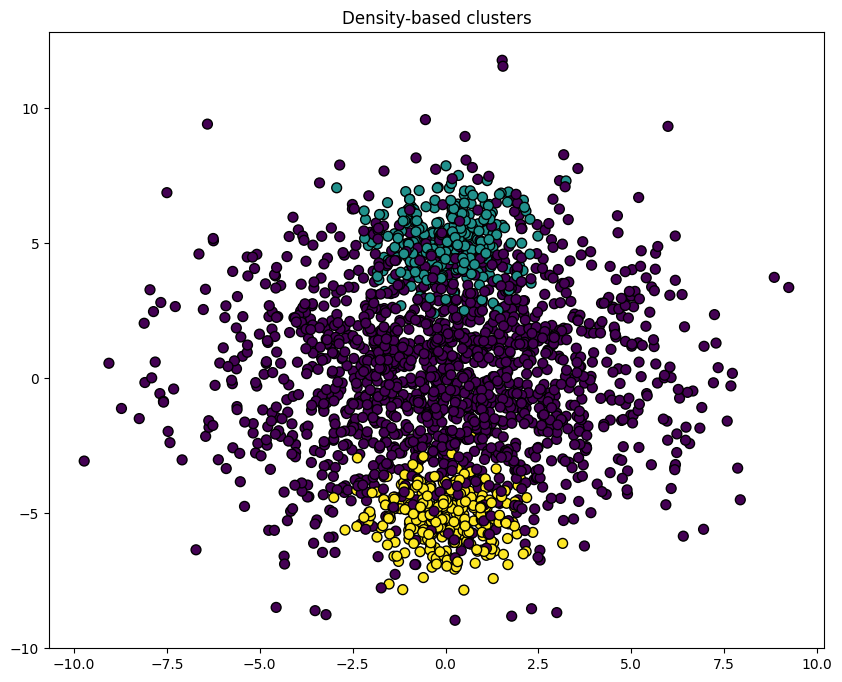

Average NMI over 10 runs: 0.300


In [5]:
X_densitybased, y_densitybased = make_blobs(
    n_samples=[1600, 300, 300],
    centers=[[0, 0], [0, 5], [0, -5]],
    cluster_std=[3.0, 1.0, 1.0],
    random_state=42
)

plt.figure(figsize=(10, 8))
plt.scatter(X_densitybased[:, 0], X_densitybased[:, 1], c=y_densitybased, s=50, cmap="viridis", edgecolor='k')
plt.title("Density-based clusters")
plt.show()

# Run K-Means 10 times and compute average NMI
nmi_list = []
for seed in range(10):
    kmeans = KMeans(n_clusters=3, random_state=seed)
    pred = kmeans.fit_predict(X_densitybased)
    nmi_list.append(normalized_mutual_info_score(y_densitybased, pred))

nmi_mean = float(np.mean(nmi_list))
print(f"Average NMI over 10 runs: {nmi_mean:.3f}")

b) Create data that has at least four dimensions and contains at least four clusters that cannot be detected correctly by k-Means. Simultaneously, they should be detected correctly by **DBSCAN**. Give the parameters with which **DBSCAN** can find those clusters.

k-Means NMI: 0.485, Adjusted Rand Index: 0.342
DBSCAN  NMI: 1.000, Adjusted Rand Index: : 1.000, clusters found: 4


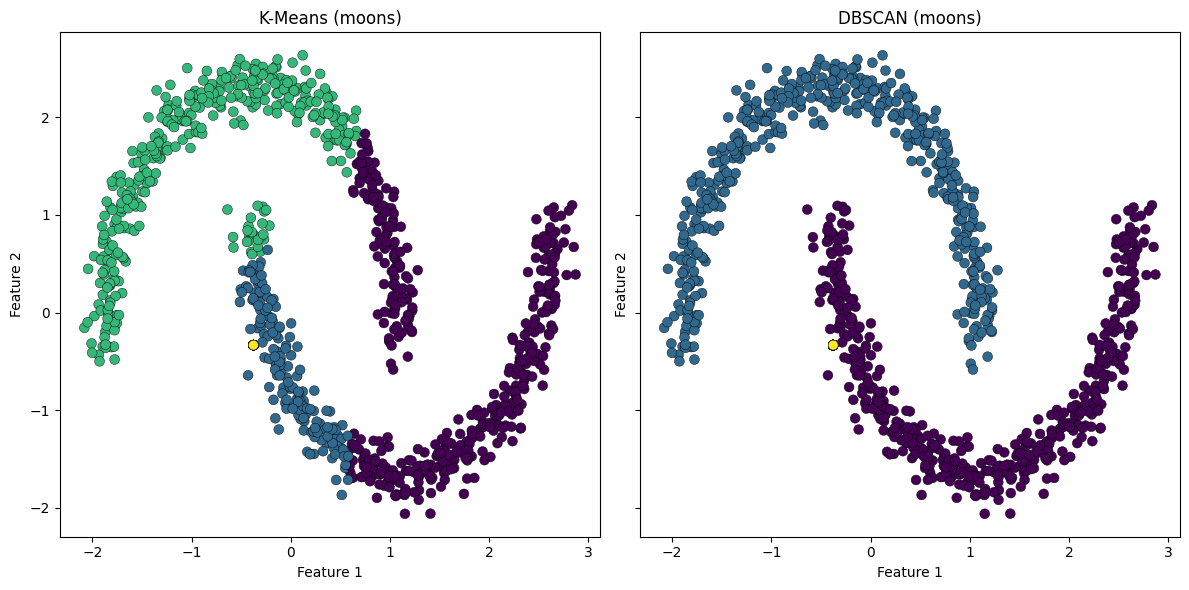

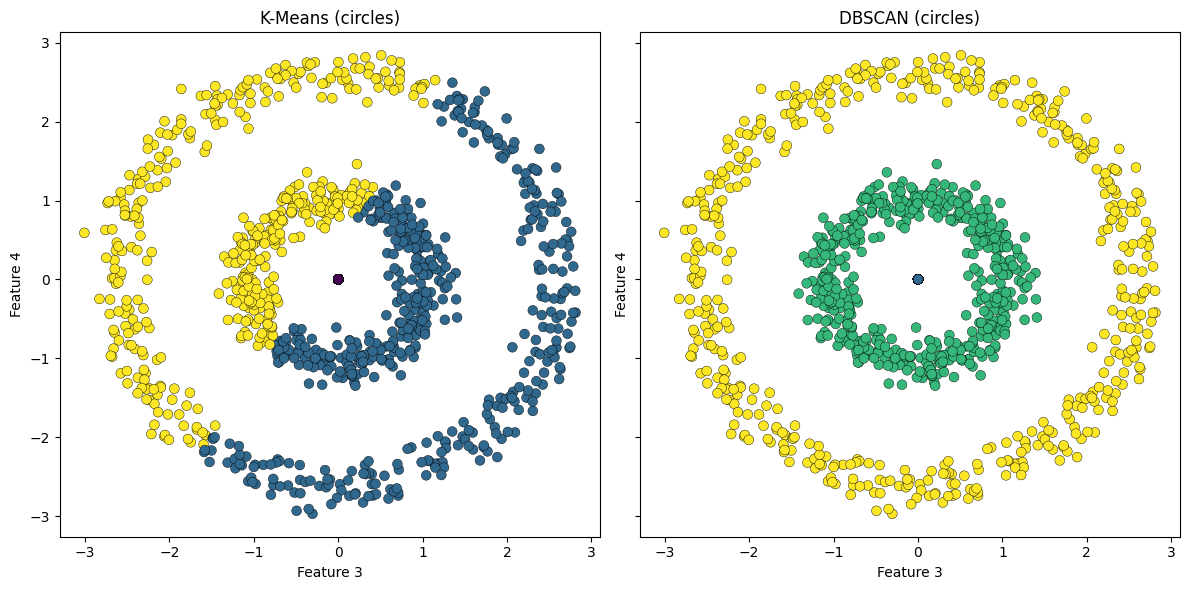

In [6]:
# Create two moons dataset and embed it to 4D
X_moons, y_moons = make_moons(n_samples=1000, noise=0.06, random_state=42)
X_moons_4d = np.c_[X_moons, np.zeros((len(X_moons), 2))]

# Create two circles dataset and embed it to 4D
X_circles, y_circles = make_circles(n_samples=1000, factor=0.4, noise=0.06, random_state=42)
X_circles_4d = np.c_[np.zeros((len(X_circles), 2)), X_circles]
y_circles += 2

# Combine all 4 clusters together
X_combined = np.vstack([X_moons_4d, X_circles_4d])
y_true = np.hstack([y_moons, y_circles])

# Scale the data for DBSCAN
X_combined_scaled = StandardScaler().fit_transform(X_combined)

# K-Means (k=4)
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(X_combined)

# DBSCAN
dbscan = DBSCAN(eps=0.35, min_samples=10)
dbscan_labels = dbscan.fit_predict(X_combined_scaled)

# NMI for K-Means and DBSCAN
nmi_kmeans = normalized_mutual_info_score(y_true, kmeans_labels)
nmi_dbscan = normalized_mutual_info_score(y_true, dbscan_labels)

# Adjusted Rand Index for K-Means and DBSCAN
adjusted_rand_index_kmeans = adjusted_rand_score(y_true, kmeans_labels)
adjusted_rand_index_dbscan = adjusted_rand_score(y_true, dbscan_labels)

# Number of clusters detected by DBSCAN
dbscan_clusters_found = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)

print(f"k-Means NMI: {nmi_kmeans:.3f}, Adjusted Rand Index: {adjusted_rand_index_kmeans:.3f}")
print(f"DBSCAN  NMI: {nmi_dbscan:.3f}, Adjusted Rand Index: : {adjusted_rand_index_dbscan:.3f}, clusters found: {dbscan_clusters_found}")

# --- Visualization of moons dataset
fig, ax = plt.subplots(1, 2, figsize=(12,6), sharex=True, sharey=True)
ax[0].scatter(X_combined_scaled[:,0], X_combined_scaled[:,1], c=kmeans_labels, s=50, cmap="viridis", edgecolor="k", linewidth=0.3)
ax[0].set_title("K-Means (moons)")
ax[1].scatter(X_combined_scaled[:,0], X_combined_scaled[:,1], c=dbscan_labels, s=50, cmap="viridis", edgecolor="k", linewidth=0.3)
ax[1].set_title("DBSCAN (moons)")
for a in ax:
  a.set_xlabel("Feature 1")
  a.set_ylabel("Feature 2")
plt.tight_layout()
plt.show()

# --- Visualization circles dataset
fig, ax = plt.subplots(1, 2, figsize=(12,6), sharex=True, sharey=True)
ax[0].scatter(X_combined_scaled[:,2], X_combined_scaled[:,3], c=kmeans_labels, s=50, cmap="viridis", edgecolor="k", linewidth=0.3)
ax[0].set_title("K-Means (circles)")
ax[1].scatter(X_combined_scaled[:,2], X_combined_scaled[:,3], c=dbscan_labels, s=50, cmap="viridis", edgecolor="k", linewidth=0.3)
ax[1].set_title("DBSCAN (circles)")
for a in ax:
  a.set_xlabel("Feature 3")
  a.set_ylabel("Feature 4")
plt.tight_layout()
plt.show()


c) Create data that has at least 10 dimensions and at least five clusters that cannot be detected correctly by **DBSCAN**. Simultaneously, they should be detected perfectly by **HDBSCAN**. Can you detect the clusters with single linkage clustering? Try it out! Explain why/why not!


NMI of DBSCAN:         0.255
NMI of HDBSCAN:        1.000
NMI of Single Linkage: 1.000


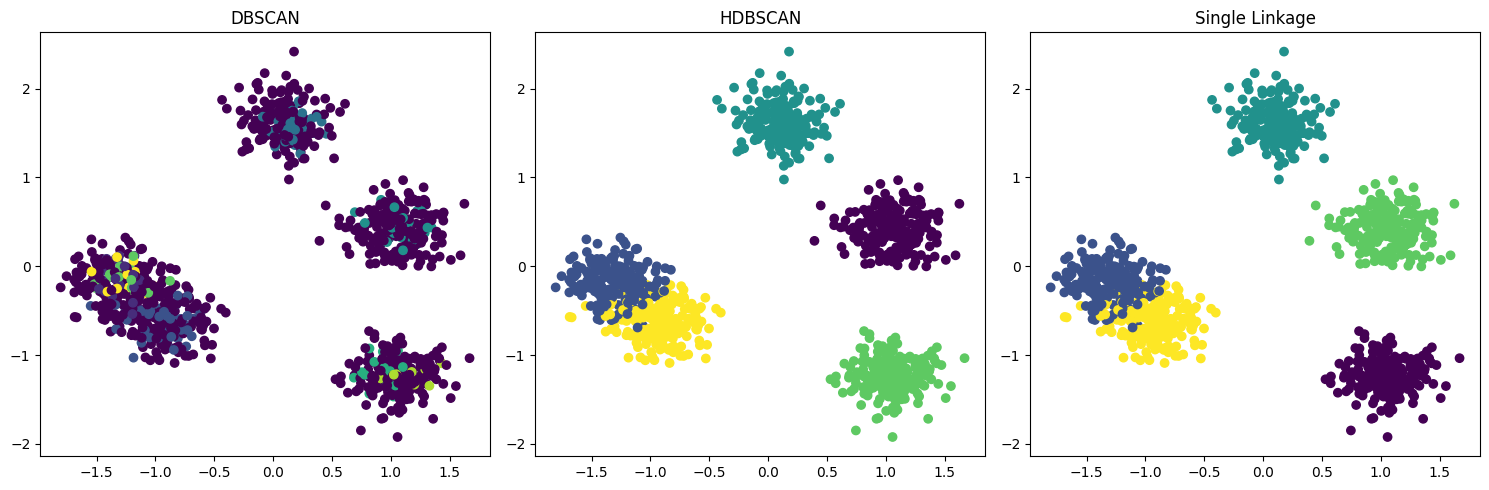

In [7]:
# Generate a sample data with 10 dimensions
X_blobs, y_blobs = make_blobs(n_samples=1000, centers=5, n_features=10, random_state=42)

# Standardize the features
X_scaled = StandardScaler().fit_transform(X_blobs)

# Apply DBSCAN
dbscan_blobs  = DBSCAN(eps=0.5, min_samples=10)
dbscan_labels = dbscan_blobs.fit_predict(X_scaled)

# Apply HDBSCAN
hdbscan_blobs  = HDBSCAN(min_cluster_size=10)
hdbscan_labels = hdbscan_blobs.fit_predict(X_scaled)

# Apply AgglomerativeClustering (Single Linkage Clustering)
agglomerative_blobs  = AgglomerativeClustering(n_clusters=5, linkage='single', metric='euclidean')
agglomerative_labels = agglomerative_blobs.fit_predict(X_scaled)

# NMI of DBSCAN, HDBSCAN and Agglomerative
nmi_dbscan        = normalized_mutual_info_score(y_blobs, dbscan_labels)
nmi_hdbscan       = normalized_mutual_info_score(y_blobs, hdbscan_labels)
nmi_agglomerative = normalized_mutual_info_score(y_blobs, agglomerative_labels)

print(f"NMI of DBSCAN:         {nmi_dbscan:.3f}")
print(f"NMI of HDBSCAN:        {nmi_hdbscan:.3f}")
print(f"NMI of Single Linkage: {nmi_agglomerative:.3f}")

# Plot all 3 clusters
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(X_scaled[:, 0], X_scaled[:, 9], c=dbscan_labels, cmap='viridis')
plt.title('DBSCAN')

plt.subplot(1, 3, 2)
plt.scatter(X_scaled[:, 0], X_scaled[:, 9], c=hdbscan_labels, cmap='viridis')
plt.title('HDBSCAN')

plt.subplot(1, 3, 3)
plt.scatter(X_scaled[:, 0], X_scaled[:, 9], c=agglomerative_labels, cmap='viridis')
plt.title('Single Linkage')

plt.tight_layout()
plt.show()

DBSCAN is perfectly suitable for indetifyling clusters of arbitary shapes amd handling noise in datasets, however it struggles with varying densities and high dimensions. One of common issues could be a choice of inappropriate epsilon parameter, as it defines the radius of the data points around. So, if epsilon is very small, it makes the algorithm label many points as noise, while a large ε can cause clusters to merge and reduce how well they're separated.

For that reason, HDBSCAN is better suited for data with varying densities and in higher dimensions, as it doesn't require a fixed epsilon.

Single linkage clustering usually doesn't handle noise very well, and in high-dimensional data, distance-based methods often struggle because of the curse of dimensionality. Still, for this dataset, single linkage actually worked perfectly — it found all the clusters just as well as HDBSCAN and did much better than DBSCAN.

d) Regard the following properties for all three datasets from 1-2 a, b, and c:

* For each cluster, compute the average distance to its mean.
* For each pair of clusters, compute the smallest distance between them.

Discuss the similarities and dissimilarities of the distributions.

In [12]:
# Function to compute average distance to cluster mean
def average_distance_to_mean(X, labels):
    unique_labels = np.unique(labels)
    avg_distances = {}
    for label in unique_labels:
        if label == -1:  # Ignore noise points
            continue
        cluster_points = X[labels == label]
        if len(cluster_points) > 0:
            cluster_mean = np.mean(cluster_points, axis=0)
            distances = np.linalg.norm(cluster_points - cluster_mean, axis=1)
            avg_distances[label] = np.mean(distances)

    return avg_distances

# Function to compute smallest distance between cluster pairs
def smallest_distance_between_clusters(X, labels):
    unique_labels = np.unique(labels)

    # Remove noise label
    if -1 in unique_labels:
        unique_labels = unique_labels[unique_labels != -1]

    min_distances = {}
    for i in range(len(unique_labels)):
        for j in range(i + 1, len(unique_labels)):
            label1 = unique_labels[i]
            label2 = unique_labels[j]
            cluster1_points = X[labels == label1]
            cluster2_points = X[labels == label2]

            if len(cluster1_points) > 0 and len(cluster2_points) > 0:
                distances = euclidean_distances(cluster1_points, cluster2_points)
                min_distances[(label1, label2)] = np.min(distances)

    return min_distances

# Dataset from 1-2 a
print("-------------")
print("Dataset 1-2 a")
print("-------------")
avg_dist_a = average_distance_to_mean(X_densitybased, y_densitybased)
min_dist_a = smallest_distance_between_clusters(X_densitybased, y_densitybased)

print("Average distance to cluster mean:")
for label, dist in avg_dist_a.items():
    print(f"Cluster {label}: {dist:.3f}")

print("\nSmallest distance between cluster pairs:")
for (label1, label2), dist in min_dist_a.items():
    print(f"Clusters {label1} and {label2}: {dist:.3f}")
print('\n')



# Dataset from 1-2 b
print("-------------")
print("Dataset 1-2 b")
print("-------------")
avg_dist_b = average_distance_to_mean(X_combined, y_true)
min_dist_b = smallest_distance_between_clusters(X_combined, y_true)

print("Average distance to cluster mean:")
for label, dist in avg_dist_b.items():
    print(f"Cluster {label}: {dist:.3f}")

print("\nSmallest distance between cluster pairs:")
for (label1, label2), dist in min_dist_b.items():
    print(f"Clusters {label1} and {label2}: {dist:.3f}")
print('\n')



# Dataset from 1-2 c
print("-------------")
print("Dataset 1-2 c")
print("-------------")
avg_dist_c = average_distance_to_mean(X_blobs, y_blobs)
min_dist_c = smallest_distance_between_clusters(X_blobs, y_blobs)

print("Average distance to cluster mean:")
for label, dist in avg_dist_c.items():
    print(f"Cluster {label}: {dist:.3f}")

print("\nSmallest distance between cluster pairs:")
for (label1, label2), dist in min_dist_c.items():
    print(f"Clusters {label1} and {label2}: {dist:.3f}")

-------------
Dataset 1-2 a
-------------
Average distance to cluster mean:
Cluster 0: 3.709
Cluster 1: 1.293
Cluster 2: 1.252

Smallest distance between cluster pairs:
Clusters 0 and 1: 0.011
Clusters 0 and 2: 0.016
Clusters 1 and 2: 4.661


-------------
Dataset 1-2 b
-------------
Average distance to cluster mean:
Cluster 0: 0.731
Cluster 1: 0.728
Cluster 2: 0.997
Cluster 3: 0.405

Smallest distance between cluster pairs:
Clusters 0 and 1: 0.261
Clusters 0 and 2: 1.184
Clusters 0 and 3: 0.870
Clusters 1 and 2: 0.837
Clusters 1 and 3: 0.236
Clusters 2 and 3: 0.288


-------------
Dataset 1-2 c
-------------
Average distance to cluster mean:
Cluster 0: 3.043
Cluster 1: 3.094
Cluster 2: 3.078
Cluster 3: 3.186
Cluster 4: 3.029

Smallest distance between cluster pairs:
Clusters 0 and 1: 11.823
Clusters 0 and 2: 23.457
Clusters 0 and 3: 29.879
Clusters 0 and 4: 20.575
Clusters 1 and 2: 22.716
Clusters 1 and 3: 31.591
Clusters 1 and 4: 20.600
Clusters 2 and 3: 15.356
Clusters 2 and 4: 13.5